In [1]:
import os
from pathlib import Path
import tifffile as tf
from IPython.display import Image, display

from gvxrPython3 import gvxr, json2gvxr

from cil.utilities.jupyter import islicer
from cil.processors import TransmissionAbsorptionConverter
from cil.utilities.display import show_geometry, show2D
from cil.recon import FBP

SimpleGVXR 2.0.2 (2022-10-06T15:32:38) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.2 (2022-10-06T15:32:37) [Compiler: GNU g++] on Linux


In [2]:
JSON_fname = "../JSON/W_fibres.json"
file_abs_path = os.path.abspath(JSON_fname)
dir_path = os.path.dirname(file_abs_path)

In [3]:
json2gvxr.initGVXR(JSON_fname, "EGL")
json2gvxr.initDetector()
json2gvxr.initSourceGeometry()
json2gvxr.initSpectrum()
json2gvxr.initSamples()
json2gvxr.initScan()

Create an OpenGL context: 800x450
Set up the detector
	Detector position: [0, 80, 0, 'mm']
	Detector up vector: [0, 0, -1]
	Detector number of pixels: [1217, 320]
	Pixel spacing: [1.9, 1.9, 'um']
Set up the beam
	Source position: [0, -144.92, 0, 'mm']
	Source shape: Parallel
Set up the CT Scan


Thu Nov 10 15:48:42 2022 ---- Create window (ID: -1)
Thu Nov 10 15:48:42 2022 ---- Query the number of EGL devices
Thu Nov 10 15:48:42 2022 ---- Success
Thu Nov 10 15:48:42 2022 ---- Detected 2 EGL devices.
Thu Nov 10 15:48:42 2022 ---- Print the details here of every EGL device.
Thu Nov 10 15:48:42 2022 ---- Success
Thu Nov 10 15:48:42 2022 ---- Device 1/2:
Thu Nov 10 15:48:42 2022 ---- 	Device Extensions: EGL_NV_device_cuda EGL_EXT_device_drm EGL_EXT_device_drm_render_node EGL_EXT_device_query_name EGL_EXT_device_persistent_id
Thu Nov 10 15:48:42 2022 ---- 	Device vendor: NVIDIA
Thu Nov 10 15:48:42 2022 ---- 	Failed to retrieve EGL DRM device file.
Thu Nov 10 15:48:42 2022 ---- Device 2/2:
Thu Nov 10 15:48:42 2022 ---- 	Device Extensions: EGL_MESA_device_software
Thu Nov 10 15:48:42 2022 ---- 	Failed to retrieve device vendor.
Thu Nov 10 15:48:42 2022 ---- 	Failed to retrieve EGL DRM device file.
Thu Nov 10 15:48:42 2022 ---- EGL client extensions: EGL_EXT_platform_base EGL_EXT_devic

In [4]:
# angles = json2gvxr.doCTScan(verbose=False)

In [5]:
# Get the path where the projections are
# output_path = json2gvxr.getFilePath(json2gvxr.params["Scan"]["OutFolder"])

In [6]:
# Save angles to file
# with open(output_path + "/angles.csv", "w") as f:
#     f.writelines([ f"{x}\n" for x in angles])

In [7]:
# with open(json2gvxr.getFilePath(json2gvxr.params["Scan"]["GifPath"]),'rb') as f:
#     display(Image(data=f.read(), format='png', width=1000))

In [8]:
from JSON2gVXRDataReader import *


In [9]:
reader = JSON2gVXRDataReader(file_name=JSON_fname)
data = reader.read()

[ 0. -1.  0.]
[  0. -80.   0.]
[0, 0, 0]
[0, 0, -1]
[1217, 320]
[0.0019, 0.0019]


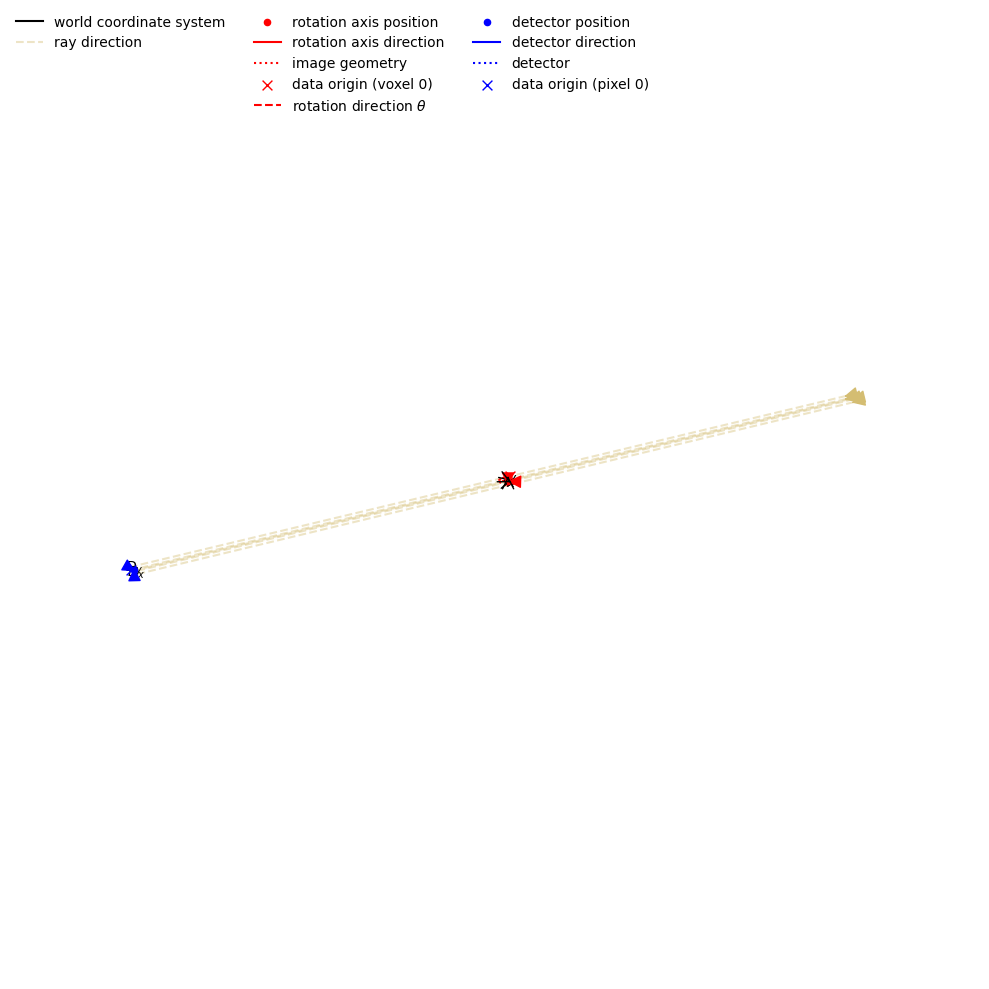

In [10]:
show_geometry(data.geometry)

In [11]:
data.reorder(order='tigre')
data_corr = TransmissionAbsorptionConverter(white_level=data.max())(data)

In [12]:
ig = data.geometry.get_ImageGeometry()
reco1 = FBP(data_corr, ig).run()

ImportError: IPP libraries not found. Cannot use CIL FBP

In [ ]:
islicer(reco1, direction='vertical', minmax=(0, 0.2))

In [ ]:
islicer(reco1, direction='horizontal_x', minmax=(0, 0.2))